<a href="https://colab.research.google.com/github/sijuswamy/intel-unnati-training/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine (SVM)

The mathematical background of Support Vector Machine (SVM) algorithm involves the concepts of linear algebra, optimization, and statistical learning theory.

At a high level, the goal of SVM is to find the best hyperplane that separates the data points into different classes while maximizing the margin between the hyperplane and the closest data points, known as support vectors. This can be formulated as an optimization problem, where the objective is to minimize the classification error while maximizing the margin.

Mathematically, given a training set of input-output pairs $\{x_ᵢ, y_ᵢ\}$ where $x_ᵢ$ is the input vector and yᵢ is the corresponding output label, SVM aims to find the hyperplane with the largest margin that separates the two classes. The hyperplane is defined as:

$w^T x + b = 0$

where $w$ is the weight vector, $b$ is the bias term, and $x$ is the input vector.

To find the optimal hyperplane, SVM solves the following optimization problem:

minimize: $1/2 ||w||^2$

subject to: $y_ᵢ(w^T x_ᵢ + b) ≥ 1$ for all $i$

where $||w||^2$ is the squared $L_2$ norm of the weight vector $w$, and $y_ᵢ$ is the output label for the i-th training example.

The first term in the objective function $(1/2 ||w||^2)$ represents the margin of the hyperplane, while the second term $(y_ᵢ(\omega^T x_ᵢ + b) ≥ 1)$ represents the constraint that the hyperplane should correctly classify all the training examples.

Once the optimal hyperplane is found, the decision boundary for classification is determined by:

$w^T x + b = 0$



## Summary

The following is a brief overview of the mathematical concepts behind SVM:

Hyperplane: A hyperplane is a subspace of one dimension less than the original space. For example, in a 2D space, a hyperplane is a line, and in a 3D space, a hyperplane is a plane. In SVM, a hyperplane is used to separate the data into different classes.

Margin: The margin is the distance between the hyperplane and the closest data points from either class. In SVM, we aim to maximize the margin, which means finding the hyperplane that is as far away from the closest data points as possible.

Support Vectors: Support vectors are the data points that are closest to the hyperplane and play a crucial role in determining the hyperplane's position. These data points lie on the margin and have non-zero coefficients in the hyperplane equation.

Optimization: The goal of SVM is to find the hyperplane that maximizes the margin while correctly classifying all the data points. This problem can be formulated as an optimization problem, where we minimize the norm of the hyperplane coefficients subject to the constraint that all the data points are classified correctly.

Lagrange Multipliers: The optimization problem for SVM is solved using the Lagrange multiplier method. This involves introducing a set of Lagrange multipliers, which act as weights for each data point and help to enforce the classification constraint.

Kernel Trick: The kernel trick is a technique used in SVM to transform the input data into a higher-dimensional space, where it may be easier to find a separating hyperplane. This is done by defining a kernel function that computes the dot product of the transformed data points without actually computing the transformation.

Overall, SVM is a powerful algorithm that can handle both linearly separable and non-linearly separable data by finding an optimal hyperplane or decision boundary between different classes. Its mathematical background makes it a versatile and robust machine learning technique.







In [ ]:
# Import required libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC # SVC stands for support vector classifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the iris dataset
iris = datasets.load_iris()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [ ]:
# Create an SVM classifier object
svm = SVC(kernel='linear', C=1, random_state=42)

In [ ]:
# Train the SVM classifier on the training data
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# predicting on traing dataset
y_pred = svm.predict(X_train)

In [ ]:
# Evaluate the accuracy of the classifier on training
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9714285714285714


In [ ]:
# Use the trained SVM classifier to make predictions on the testing data
y_pred = svm.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


## Identifying the best parameters

In [ ]:

grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}


In [ ]:
svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9619047619047618
Test Score: 1.0


In [ ]:
svm_cv.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Plotting the Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.3, random_state=42)

In [ ]:
svm.fit(X_train, y_train)

SVC()

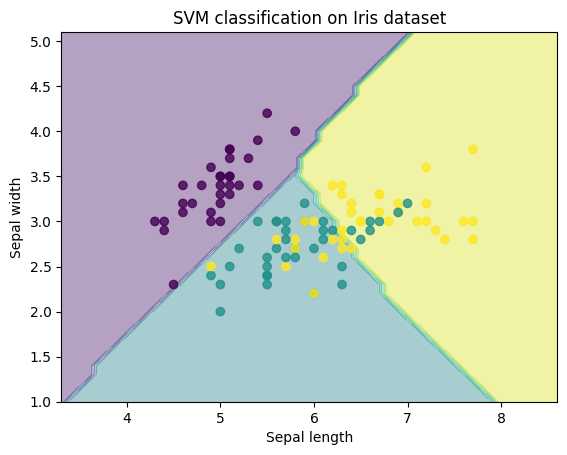

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM classification on Iris dataset')
plt.show()



